# Problem Solving with Simulation

# What is Simulation?

# Randomness in Python

In [1]:
import random

print(random.randint(1, 6))   # Random integer between 1 and 6
print(random.random())        # Random float between 0 and 1

6
0.6050939740967819


# Coin Flip Simulation

In [2]:
import random

flips = 1000
heads = 0

for _ in range(flips):
    if random.choice(["H", "T"]) == "H":
        heads += 1

print("Heads:", heads, "Tails:", flips - heads)

Heads: 511 Tails: 489


# Dice Roll Simulation

In [3]:
rolls = [random.randint(1, 6) for _ in range(1000)]
print("Average roll:", sum(rolls) / len(rolls))

Average roll: 3.546


## Random Data Distribution
A random distribution is a set of random numbers that follow a certain probability density function.

Probability Density Function: A function that describes a continuous probability. i.e. probability of all values in an array.

We can generate random numbers based on defined probabilities using the choice() method of the random module.

The choice() method allows us to specify the probability for each value.

The probability is set by a number between 0 and 1, where 0 means that the value will never occur and 1 means that the value will always occur.

Example Get your own Python Server
Generate a 1-D array containing 100 values, where each value has to be 3, 5, 7 or 9.

The probability for the value to be 3 is set to be 0.1

The probability for the value to be 5 is set to be 0.3

The probability for the value to be 7 is set to be 0.6

The probability for the value to be 9 is set to be 0

In [1]:
from numpy import random

x = random.choice([3, 5, 7, 9], p=[0.1, 0.3, 0.6, 0.0], size=(100))

print(x)

[5 7 7 7 7 7 7 7 7 5 5 5 5 5 5 7 5 5 5 5 5 5 3 5 7 5 7 3 5 7 7 7 5 5 7 7 3
 7 7 5 7 5 5 7 5 5 7 7 7 5 7 5 7 7 3 7 7 7 7 7 7 7 5 7 7 7 5 5 7 7 7 7 7 5
 3 7 7 7 7 7 7 3 7 7 7 5 7 7 5 5 5 7 7 7 7 7 5 5 7 3]


In [2]:
from numpy import random

x = random.choice([3, 5, 7, 9], p=[0.1, 0.3, 0.6, 0.0], size=(3, 5))

print(x)

[[7 5 7 7 5]
 [5 7 7 7 5]
 [7 3 7 7 7]]


## Random Permutations
Random Permutations of Elements
A permutation refers to an arrangement of elements. e.g. [3, 2, 1] is a permutation of [1, 2, 3] and vice-versa.

The NumPy Random module provides two methods for this: shuffle() and permutation().

Shuffling Arrays
Shuffle means changing arrangement of elements in-place. i.e. in the array itself.

In [3]:
from numpy import random
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

random.shuffle(arr)

print(arr)

[2 1 3 5 4]


## Generating Permutation of Arrays

In [4]:
from numpy import random
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

print(random.permutation(arr))

[4 2 3 5 1]


## Normal (Gaussian) Distribution
The Normal Distribution is one of the most important distributions.

It is also called the Gaussian Distribution after the German mathematician Carl Friedrich Gauss.

It fits the probability distribution of many events, eg. IQ Scores, Heartbeat etc.

Use the random.normal() method to get a Normal Data Distribution.

It has three parameters:

loc - (Mean) where the peak of the bell exists.

scale - (Standard Deviation) how flat the graph distribution should be.

size - The shape of the returned array.

In [5]:
from numpy import random

x = random.normal(size=(2, 3))

print(x)

[[ 1.29871803  1.44373513 -0.2672349 ]
 [ 0.0187908   0.94193244 -0.49811093]]


In [6]:
from numpy import random

x = random.normal(loc=1, scale=2, size=(2, 3))

print(x)

[[-0.86272588  4.00000724  0.23408483]
 [ 1.29474807 -2.72701956  1.2583029 ]]


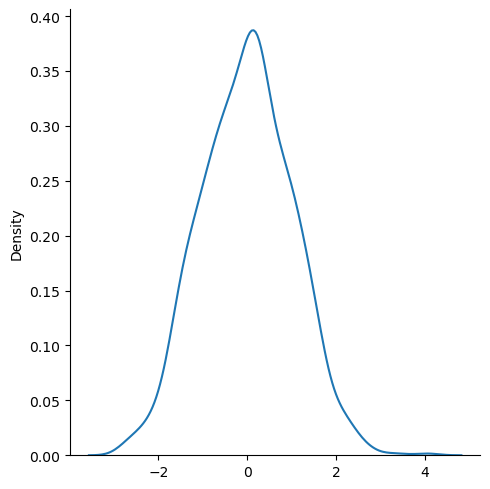

In [8]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(random.normal(size=1000), kind="kde")

plt.show()

# Monte Carlo Method

# Monte Carlo: Estimating Pi

In [4]:
import random

inside_circle = 0
total_points = 100000

for _ in range(total_points):
    x, y = random.random(), random.random()
    if x**2 + y**2 <= 1:
        inside_circle += 1

pi_estimate = (inside_circle / total_points) * 4
print("Estimated Pi:", pi_estimate)

Estimated Pi: 3.13752


Simulated E[S_T] ≈ 108.314
Theoretical E[S_T] = 108.329
Simulated Std[S_T] ≈ 21.664


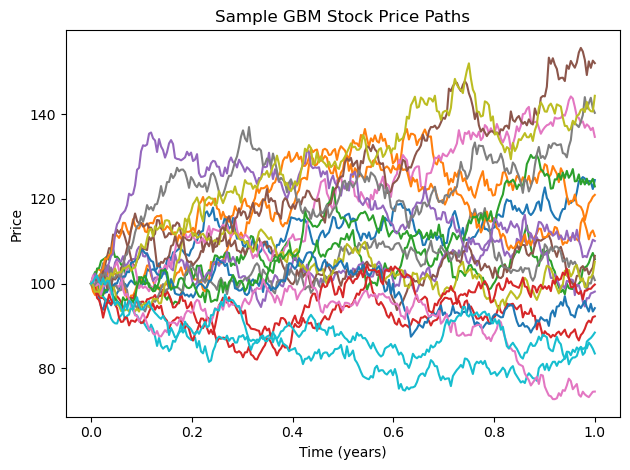

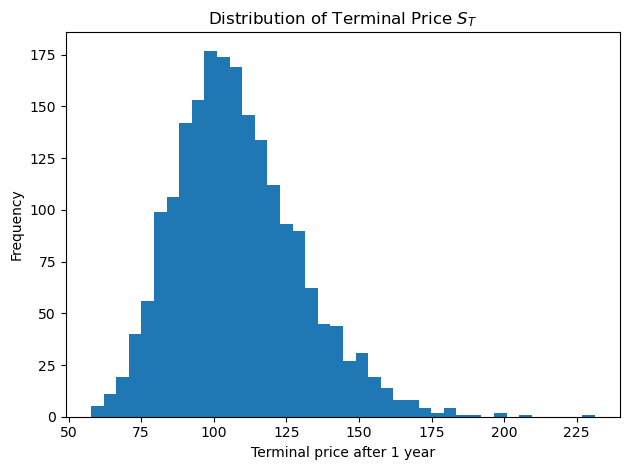

In [11]:
# Simple NumPy finance simulation with plots
# - Simulates stock prices with Geometric Brownian Motion (GBM)
# - Shows (1) a few sample paths over one year, and (2) a histogram of terminal prices
# - Prints a quick check: simulated mean vs theoretical mean S0*exp(mu*T)
#
# You can download the script version after this cell runs.
import numpy as np
import matplotlib.pyplot as plt
import math
from pathlib import Path

# --- Parameters (feel free to change) ---
S0 = 100.0        # initial price
mu = 0.08         # annual drift (8%)
sigma = 0.20      # annual volatility (20%)
T = 1.0           # years
steps = 252       # trading days
n_paths = 2000    # total paths for distribution stats
n_paths_to_plot = 20  # how many paths to draw on the time-series plot

rng = np.random.default_rng(123)

# --- Vectorized GBM simulation ---
dt = T / steps
# standard normals for all steps and paths
Z = rng.standard_normal(size=(steps, n_paths))
# log-increments
increments = (mu - 0.5 * sigma**2) * dt + sigma * math.sqrt(dt) * Z
# cumulative log-returns; prepend zeros for t=0
log_paths = np.vstack([np.zeros((1, n_paths)), np.cumsum(increments, axis=0)])
S = S0 * np.exp(log_paths)  # shape: (steps+1, n_paths)

# --- Quick, verifiable checks ---
terminal = S[-1]
sim_mean = float(np.mean(terminal))
theory_mean = S0 * math.exp(mu * T)
sim_std = float(np.std(terminal, ddof=1))

print(f"Simulated E[S_T] ≈ {sim_mean:.3f}")
print(f"Theoretical E[S_T] = {theory_mean:.3f}")
print(f"Simulated Std[S_T] ≈ {sim_std:.3f}")

# --- Plot 1: a few GBM paths ---
fig1 = plt.figure()
tgrid = np.linspace(0, T, steps + 1)
for i in range(n_paths_to_plot):
    plt.plot(tgrid, S[:, i])
plt.title("Sample GBM Stock Price Paths")
plt.xlabel("Time (years)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

# --- Plot 2: distribution of terminal prices ---
fig2 = plt.figure()
plt.hist(terminal, bins=40)
plt.title("Distribution of Terminal Price $S_T$")
plt.xlabel("Terminal price after 1 year")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



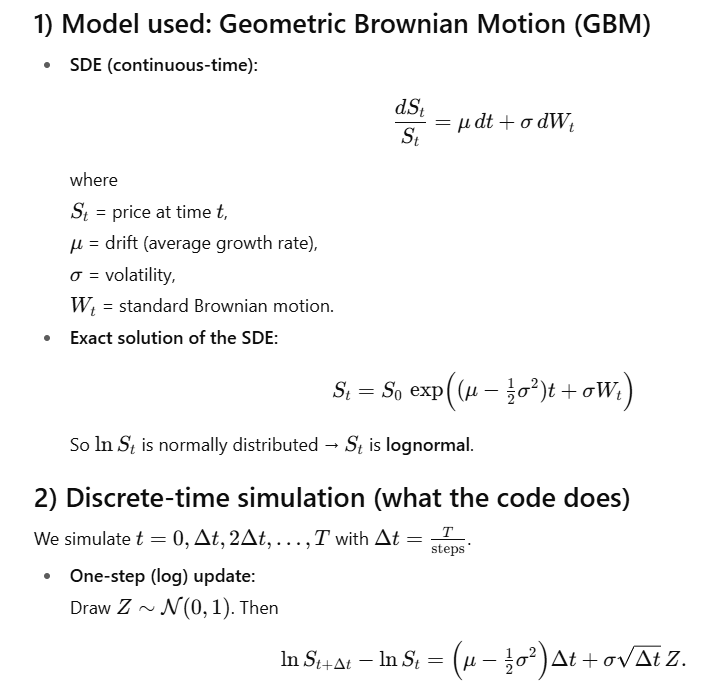

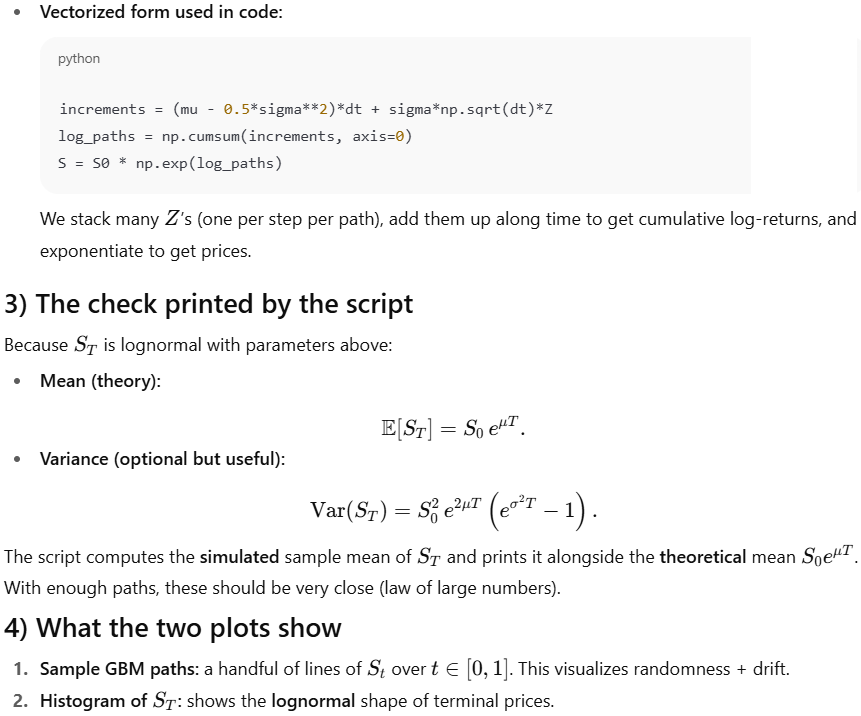

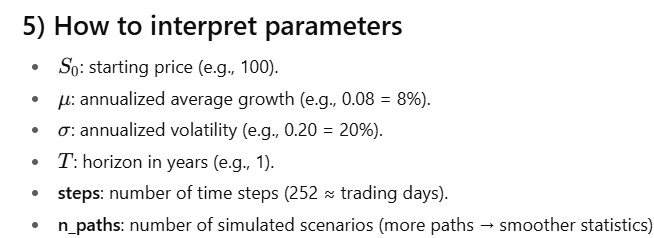

# When to Use Simulation

https://github.com/ph7klw76/SQA7018/blob/main/Problem1.md

# In-Class Activity

# Common Mistakes

# Key Takeaways

# Homework